In [1]:
import os
import sys
import numpy as np
from scipy.ndimage import zoom
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

In [8]:
# Depth 이미지 로드
depth_image_path = "data/depth_map/result_0/00001.png"
depth_image = Image.open(depth_image_path)

# 이미지 정보 출력
print(f"이미지 모드: {depth_image.mode}")  # "I;16"일 경우 16비트 정수
print(f"이미지 크기: {depth_image.size}")  # (W, H)

# 이미지 데이터를 NumPy 배열로 변환
depth_array = np.array(depth_image)

# 데이터 타입 및 값 범위 확인
print(f"데이터 타입: {depth_array.dtype}")  # ex: uint16, float32
print(f"값 범위: {depth_array.min()} ~ {depth_array.max()}")


이미지 모드: RGB
이미지 크기: (1024, 1024)
데이터 타입: uint8
값 범위: 1 ~ 254


In [10]:
import cv2

depth_image = Image.open(depth_image_path)

# Check image metadata
image_mode = depth_image.mode
image_size = depth_image.size

# Convert image to NumPy array
depth_array = np.array(depth_image)

# Check data type and range
data_type = depth_array.dtype
value_min = depth_array.min()
value_max = depth_array.max()

# Display results
image_mode, image_size, data_type, value_min, value_max

('RGB', (1024, 1024), dtype('uint8'), 1, 254)

In [11]:
from PIL import Image
import numpy as np

# 이미지 로드
image = depth_image

# RGB 모드인 경우 Grayscale로 변환
if image.mode == "RGB":
    image = image.convert("L")  # Grayscale로 변환

# 픽셀 값을 16비트로 변환 (256 곱하기)
image_16bit = (np.array(image) * 256).astype(np.uint16)

# 변환된 16비트 depth map 저장
Image.fromarray(image_16bit).save("depth_00000_uint16.png")

print("16비트 Depth Map으로 변환 및 저장 완료.")


16비트 Depth Map으로 변환 및 저장 완료.


In [12]:
from PIL import Image
import numpy as np

# 변환된 16비트 이미지를 다시 로드
image_16bit = Image.open("depth_00000_uint16.png")

# 이미지 속성 출력
print(f"이미지 모드: {image_16bit.mode}")
print(f"이미지 크기: {image_16bit.size}")
print(f"데이터 타입: {np.array(image_16bit).dtype}")
print(f"값 범위: {np.array(image_16bit).min()} ~ {np.array(image_16bit).max()}")


이미지 모드: I;16
이미지 크기: (1024, 1024)
데이터 타입: uint16
값 범위: 14080 ~ 63232


/home/dhai/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dhai/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dhai/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dhai/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dhai/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from current font.
  fig.canvas.print_figure(bytes_io,

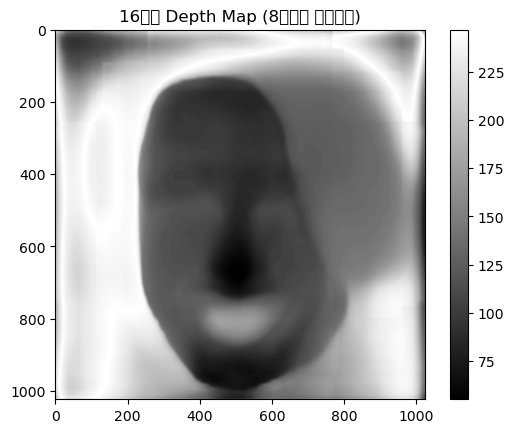

In [13]:
import cv2
import matplotlib.pyplot as plt

# 변환된 16비트 이미지 로드
image_16bit = cv2.imread("depth_00000_uint16.png", cv2.IMREAD_UNCHANGED)

# 16비트 이미지를 8비트로 스케일링
image_8bit = (image_16bit / 256).astype(np.uint8)

# 시각적으로 확인
plt.imshow(image_8bit, cmap="gray")
plt.title("16비트 Depth Map (8비트로 스케일링)")
plt.colorbar()
plt.show()


In [14]:
# 원본 이미지와 변환된 이미지 로드
original = Image.open(depth_image_path).convert("L")
converted = Image.open("depth_00000_uint16.png")

# 값 비교
original_array = np.array(original)
converted_array = np.array(converted) / 256  # 다시 8비트로 변환

# 비교 출력
print(f"원본 값 범위: {original_array.min()} ~ {original_array.max()}")
print(f"변환된 값 범위: {converted_array.min()} ~ {converted_array.max()}")
print(f"값 차이: {np.abs(original_array - converted_array).max()}")


원본 값 범위: 55 ~ 247
변환된 값 범위: 55.0 ~ 247.0
값 차이: 0.0


In [4]:
# 이미지 읽기 (16비트)
depth_16bit_image = Image.open(depth_image_path)

# 데이터 배열로 변환
depth_array = np.array(depth_16bit_image)

# 데이터 정보 확인
print(f"이미지 모드: {depth_16bit_image.mode}")  # "I;16"일 가능성 있음
print(f"이미지 크기: {depth_array.shape}")
print(f"값 범위: {depth_array.min()} ~ {depth_array.max()}")

이미지 모드: RGB
이미지 크기: (1024, 1024, 3)
값 범위: 1 ~ 254


In [5]:
# Depth 값 복구
depth_values = depth_array.astype(np.float32) / 256.0

# 복구된 값 정보
print(f"복구된 Depth 값 범위: {depth_values.min()} ~ {depth_values.max()}")


복구된 Depth 값 범위: 0.00390625 ~ 0.9921875


In [ ]:
# Depth 값을 0~255로 스케일링
depth_image = (depth_normalized * 255).astype(np.uint8)

# 시각화
cv2.imshow('Depth Image', depth_image)
cv2.waitKey(0)

# 또는 matplotlib로 확인
plt.imshow(depth_normalized, cmap='gray')
plt.colorbar()
plt.title("Normalized Depth Map")
plt.show()

In [16]:
# 마스크 불러오기
mask = np.load('data/etcs/train_label/00000/00001.npy')

In [17]:
depth_map = cv2.imread("depth_00000_uint16.png", cv2.IMREAD_UNCHANGED)

In [19]:
mask_resized = zoom(mask, (2, 2), order=0)
masked_depth_map = depth_map * mask_resized

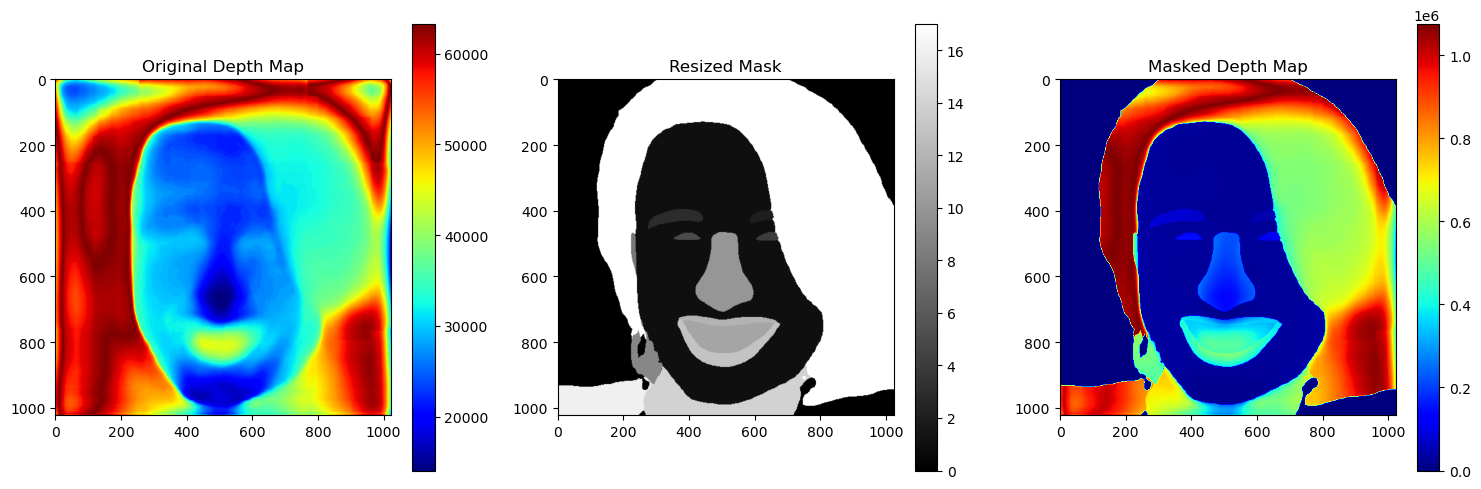

In [20]:
# Visualize results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Depth Map')
plt.imshow(depth_map, cmap='jet')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title('Resized Mask')
plt.imshow(mask_resized, cmap='gray')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title('Masked Depth Map')
plt.imshow(masked_depth_map, cmap='jet')
plt.colorbar()

plt.tight_layout()
plt.show()

In [23]:
print("Unique values in npy:", np.unique(mask))

Unique values in npy: [ 0  1  2  3  4  5  8  9 10 11 12 13 14 16 17]


In [35]:
npy_data = np.load('data/etcs/train_label/00000/00001.npy')
npy_resized = zoom(npy_data, (2, 2), order=0)
mask = (npy_resized == 1) | (npy_resized == 10)
masked_depth_map[~mask] = depth_map.max() 

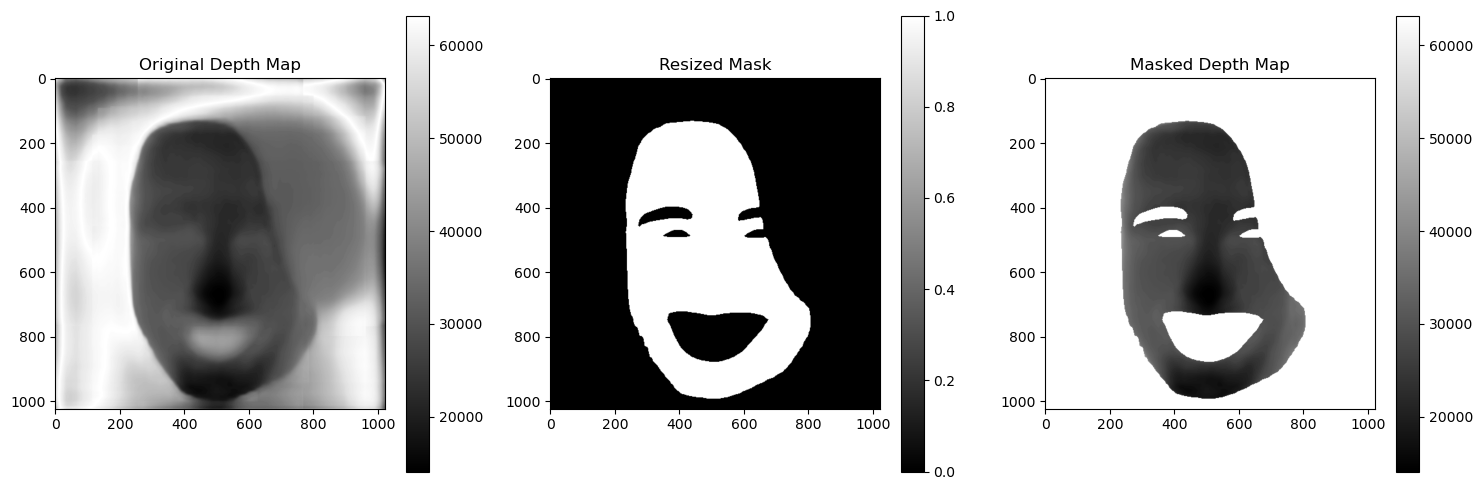

In [36]:
# Visualize results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Depth Map')
plt.imshow(depth_map, cmap='gray')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title('Resized Mask')
plt.imshow(mask, cmap='gray')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title('Masked Depth Map')
plt.imshow(masked_depth_map, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()

In [34]:
print(f"이미지 크기: {masked_depth_map.shape}")  # NumPy 배열의 크기
print(f"데이터 타입: {masked_depth_map.dtype}")  # NumPy 배열의 데이터 타입
print(f"값 범위: {masked_depth_map.min()} ~ {masked_depth_map.max()}")  # 최소/최대값

이미지 크기: (1024, 1024)
데이터 타입: uint16
값 범위: 0 ~ 46336


In [37]:
np.save("masked_depth_map.npy", masked_depth_map)


In [ ]:
def process_npy_and_png(npy_directory, png_directory, output_directory, show_results=False):
    npy_files = [f for f in os.listdir(npy_directory) if f.endswith('.npy')]
    
    for npy_file in tqdm(npy_files, desc="Processing files"):
        # npy 파일 이름에서 번호 추출
        file_number = npy_file.replace('.npy', '')
        
        # 1000 단위로 나뉘어 있는 하위 폴더 경로 생성
        folder_number = str(int(file_number) // 1000 * 1000).zfill(5)  # 00000, 01000, ...
        png_path = os.path.join(png_directory, folder_number, f"{file_number}.png")
        npy_path = os.path.join(npy_directory, npy_file)

        if os.path.exists(png_path) and os.path.exists(npy_path):
            print(f"Processing {png_path} with {npy_file}")  # 디버깅 출력
            npy_data = np.load(npy_path)
            npy_resized = zoom(npy_data, (2, 2), order=0)

            image = Image.open(png_path)
            image_array = np.array(image)

            mask = (npy_resized == 1) | (npy_resized == 10)
            result_array = image_array.copy()
            result_array[~mask] = 0

            result_image = Image.fromarray(result_array)
            output_path = os.path.join(output_directory, f"{file_number}.png")
            result_image.save(output_path)

            if show_results:
                # 원본, 마스크, 결과 이미지 시각화
                plt.figure(figsize=(12, 4))
                plt.subplot(1, 3, 1)
                plt.imshow(image_array)
                plt.title('Original Image')
                plt.axis('off')

                plt.subplot(1, 3, 2)
                plt.imshow(mask, cmap='gray')
                plt.title('Mask')
                plt.axis('off')

                plt.subplot(1, 3, 3)
                plt.imshow(result_array)
                plt.title('Masked Image')
                plt.axis('off')

                plt.show()
        else:
            print(f"File not found: {png_path} or {npy_path}")

In [ ]:
base_npy_directory = './data/etcs/train_label'  # npy 파일 경로
png_directory = './data/depth_map'      # 원본 이미지 경로
base_output_directory = './data/weak_wrinkle_image'      # 출력 경로

start_folder = 00000  # 예: 00000부터 시작
end_folder = 49999  # 예: 50000까지